<img src="../../img/ml_theme.png">
## <center> Дополнительное профессиональное <br> образование НИУ ВШЭ </center>
#### <center>Программа "Практический анализ данных и машинное обучение" </center>
<img src="../../img/faculty_logo.jpg" height="240" width="240">
### <center> Автор материала: Ирина Скрылева </center>

## <font color='green'>Review. Часть 1</font>

-       описание набора данных и признаков (на понятном русском, желательно с картинками) - 1 балл

<font color='green'>1 балл. 
</font>

-       первичный анализ признаков  - 3 балла

<font color='green'>3 балла. <br> <br> 
</font>

-       первичный визуальный анализ признаков  - 3 балла

<font color='green'>3 балла. <br> 
</font>

-       если пришли к каким-то "инсайтам", обнаружили закономерности - изложите  - 3 балла

<font color='green'>3 балла <br> Первая часть проекта выполнена очень хорошо. </font>

## <font color='green'>Итого: 10 баллов (округл.)</font>

## <center> Индивидуальный проект по анализу данных </center>

**План исследования**
 - Описание набора данных и признаков
 - Первичный анализ признаков
 - Первичный визуальный анализ признаков
 - Закономерности, "инсайты", особенности данных
 - Предобработка данных
 - Построение признаков
 - Отбор признаков
 - Построение модели
 - Кросс-валидация, подбор параметров
 - Кривые валидации и обучения
 - Прогноз для тестовой (или отложенной) выборки
 - Оценка модели с описанием выбранной метрики
 - Выводы

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


###  Часть 1. Описание набора данных и признаков

*Тут надо дать ссылку на данные, описать признаки, рассказать, какая задача будет решаться.*

### <center> Santander Customer Satisfaction</center> 
Проект взят по ссылке:

https://www.kaggle.com/c/santander-customer-satisfaction

<img src="santander_custsat_red.png" width="700">

**Which customers are happy customers?**

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

File descriptions

train.csv - the training set including the target

test.csv - the test set without the target

sample_submission.csv - a sample submission file in the correct format
__________

**Какие клиенты являются счастливыми?**

Удовлетворение потребностей клиентов является ключевым показателем успеха. Несчастные клиенты редко высказывают свое недовольство перед уходом.

Необходимо выявить недовольных клиентов в начале их отношений с банком Santander. Это позволило бы Santander предпринять активные шаги, чтобы улучшить удовлетворенность клиента, прежде чем станет слишком поздно.

В этом конкурсе, вы будете работать с сотнями анонимизированных признаков, чтобы предсказать, доволен или недоволен клиент их банковским опытом.


Предоставляется анонимный набор данных, содержащий большое количество числовых переменных. 

Столбец "TARGET" является переменной, которую необходмо предсказать, где:

"1" - неудовлетворенные клиенты,

"0" - довольные клиенты.

**Задача**: предсказать вероятность для каждого клиента из тестового набора быть неудовлетворенным.

In [2]:
df = pd.read_csv('train.csv') # обучающая выборка

In [3]:
X = df.drop('TARGET',axis=1) # признаки

In [4]:
y = df['TARGET'] # целевая переменная

###  Часть 2. Первичный анализ признаков

In [5]:
# Данные 
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


**Размер выборки**

In [6]:
print('Количество записей в выборке:', X.shape[0])
print('Количество признаков:',X.shape[1])

Количество записей в выборке: 76020
Количество признаков: 370


In [7]:
y.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

В выборке виден дисбаланс классов прогнозируемой переменной.

**Типы признаков**

In [8]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 370 columns):
ID                               int64
var3                             int64
var15                            int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                       int64
ind_var1                         int6

*Найдем все бинарные признаки:*

In [9]:
X_bin = []

c = X.columns
for i in range(0,len(c)):
    if (X[c[i]].value_counts().index.min() == 0) & (X[c[i]].value_counts().index.max() == 1):
        X_bin.append(c[i])
        

In [10]:
print('Количество бинарных признаков:', len(X_bin))

Количество бинарных признаков: 66


In [11]:
X[X_bin].head(5)

,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,...,ind_var44_0,ind_var44,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1


*Найдем все вещественные признаки:*

In [12]:
X_float = []

c = X.drop(X_bin,axis=1).columns

for i in range(0,len(c)):
    if (type(X[c[i]][3]) == float64):
        X_float.append(c[i])

In [13]:
print('Количество вещественных признаков:', len(X_float))

Количество вещественных признаков: 111


In [14]:
X[X_float].head(5)

,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


*Найдем все целочисленные признаки:*

In [15]:
X_int = []

c = X.drop(X_bin,axis=1).drop(X_float,axis=1).columns

for i in range(0,len(c)):
    if (type(X[c[i]][3]) == int64):
        X_int.append(c[i])

In [16]:
print('Количество целочисленных признаков:', len(X_int))

Количество целочисленных признаков: 193


In [17]:
X[X_int].head(5)

,ID,var3,var15,ind_var2_0,ind_var2,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var41,...,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,2,37,0,0,0,0,0,0,0,...,0,0,0,27,3,18,48,0,0,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Проверка: все ли признаки отнесены к той или иной категории
len(X_bin)+len(X_float)+len(X_int)==len(X.columns)

True

**Статистические показатели признаков**

In [19]:
stats = X.describe().T

In [20]:
stats[20:25]

,count,mean,std,min,25%,50%,75%,max
ind_var1_0,76020.0,0.011458,0.106425,0.0,0.0,0.0,0.0,1.0
ind_var1,76020.0,0.003762,0.061221,0.0,0.0,0.0,0.0,1.0
ind_var2_0,76020.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ind_var2,76020.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ind_var5_0,76020.0,0.958024,0.200535,0.0,1.0,1.0,1.0,1.0


*Пропуски в данных*

In [21]:
stats['count'].value_counts()

76020.0    370
Name: count, dtype: int64

* Пропусков в данных нет

*Выбросы*

In [83]:
f_ = []
c = X.columns
for i in range(0,len(c)):
    st = X[c[i]][X[c[i]] != 0].describe()
    if (st['max'] > st['75%']+1.5*(st['75%']-st['25%'])) or (st['min'] < st['25%']-1.5*(st['75%']-st['25%'])):
        f_.append(c[i])

In [84]:
print('* Из ', len(X.columns), 'имеющихся признаков ', len(f_), 'имеют выбросы относительно интерквартильного размаха')

* Из  370 имеющихся признаков  191 имеют выбросы относительно интерквартильного размаха


Выбросы оценивались в каждом признаке, исключая нулевые значения

*Признаки-константы и дубликаты*

Можно заметить существование признаков с полностью нулевыми значениями. Также возможно существование признаков-констант.

Исключим эти признаки из набора данных:

In [22]:
# Поиск полностью нулевых признаков и признаков-констант
F_c = stats[(stats['std'] == 0) ].index
print('Количество нулевых признаков и признаков-констант: ', len(F_c))

Количество нулевых признаков и признаков-констант:  34


In [23]:
# Набор данных бех признаков-констант
X_1 = X.drop(F_c, axis = 1)

Проверим на наличие дубликатов в столбцах:

In [41]:
c = X_1.columns
eq = []

# Попарное сравнение столбцов
for i in range(0,len(c)):
    for j in range(i+1,len(c)):
        if (X_1[c[i]] == X_1[c[j]]).min() == True:
            eq.append([c[i],c[j]])   
    

In [42]:
eq = pd.DataFrame(eq)
print('Количество пар дубликатов:',eq[1].count())

Количество пар дубликатов: 29


In [43]:
# Набор данных без дубликатов
X_2 = X_1.drop(list(eq[1]), axis=1)

In [44]:
print('Количество признаков в исходном наборе данных:', len(X.columns))
print('Количество признаков после удаления признаков-констант и дубликатов:', len(X_2.columns))

Количество признаков в исходном наборе данных: 370
Количество признаков после удаления признаков-констант и дубликатов: 307


**Выберем наиболее важные признаки**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
forest = RandomForestClassifier(n_estimators=1000, max_depth = 10,
                                random_state=42).fit(X_2, y)

In [50]:
features = pd.DataFrame(forest.feature_importances_,
                        index=X_2.columns, 
                        columns=['Importance']).sort(['Importance'],
                                                     ascending=False)
# Первые 10 признаков:
f=(features.head(10).index)
features.head(10)

,Importance
var15,0.129594
var38,0.047854
saldo_var30,0.046288
saldo_var42,0.037195
saldo_medio_var5_ult1,0.024995
saldo_var5,0.024780
num_var4,0.023899
num_meses_var5_ult3,0.022263
saldo_medio_var5_hace2,0.021960
ind_var30,0.021160


In [51]:
# Набор данных наиболее важных признаков
X_imp = X_2[f]
X_imp.head()

,var15,var38,saldo_var30,saldo_var42,saldo_medio_var5_ult1,saldo_var5,num_var4,num_meses_var5_ult3,saldo_medio_var5_hace2,ind_var30
0,23,39205.170000,0.00,0.00,0.00,0.00,0,0,0.00,0
1,34,49278.030000,300.00,0.00,0.00,0.00,1,1,0.00,1
2,23,67333.770000,3.00,3.00,3.00,3.00,1,3,3.00,1
3,37,64007.970000,70.62,70.62,91.56,70.62,3,2,186.09,1
4,39,117310.979016,135003.00,135003.00,40501.08,0.00,1,3,3.00,1


In [52]:
X_f = [] # выбранные вещественные признаки
X_i = [] # выбранные целочисленные признаки
X_b = [] # выбранные бинарные признаки

c = X_imp.columns
for i in range(0,len(c)):
     if (X_imp[c[i]].value_counts().index.min() == 0) & (X_imp[c[i]].value_counts().index.max() == 1):
            X_b.append(c[i])

c = X_imp.drop(X_b,axis=1).columns

for i in range(0,len(c)):
    if (type(X_imp[c[i]][3]) == float64):
        X_f.append(c[i])

c = X_imp.drop(X_b,axis=1).drop(X_f,axis=1).columns

for i in range(0,len(c)):
    if (type(X_imp[c[i]][3]) == int64):
        X_i.append(c[i])

**Зависимости выбранных признаков друг от друга и зависимость целевого признака от других**

In [85]:
from scipy.stats import pearsonr

Оценим зависимость вещественных признаков друг от друга с помощью коэффициента корреляции Пирсона:

In [54]:
X_imp[X_f].head(4)

,var38,saldo_var30,saldo_var42,saldo_medio_var5_ult1,saldo_var5,saldo_medio_var5_hace2
0,39205.17,0.00,0.00,0.00,0.00,0.00
1,49278.03,300.00,0.00,0.00,0.00,0.00
2,67333.77,3.00,3.00,3.00,3.00,3.00
3,64007.97,70.62,70.62,91.56,70.62,186.09


In [55]:
c = X_imp[X_f].columns
pears=[]
for i in range(0,len(c)):
    for j in range(i+1,len(c)):
        pp=pearsonr(X_imp[c[i]],X_imp[c[j]])
        p=[c[i],c[j],pp[0]]
        pears.append(p)

In [56]:
pears = pd.DataFrame(pears)
print('Наиболее коррелируемые пары признаков:')
pears.sort(columns = 2, ascending=False).head(10)

Наиболее коррелируемые пары признаков:


,0,1,2
12,saldo_medio_var5_ult1,saldo_var5,0.838142
5,saldo_var30,saldo_var42,0.792772
13,saldo_medio_var5_ult1,saldo_medio_var5_hace2,0.536249
14,saldo_var5,saldo_medio_var5_hace2,0.389211
8,saldo_var30,saldo_medio_var5_hace2,0.387112
11,saldo_var42,saldo_medio_var5_hace2,0.292410
9,saldo_var42,saldo_medio_var5_ult1,0.225363
6,saldo_var30,saldo_medio_var5_ult1,0.213331
10,saldo_var42,saldo_var5,0.194311
7,saldo_var30,saldo_var5,0.155236


остальные зависимости онаружим визуально.

###  Часть 3. Первичный визуальный анализ признаков

In [59]:
import seaborn as sns

In [357]:
figsize=(6,4)

**Целочисленные переменные**

In [73]:
X_i # целочисленные переменные

['var15', 'num_var4', 'num_meses_var5_ult3']

*Переменная "var15"*

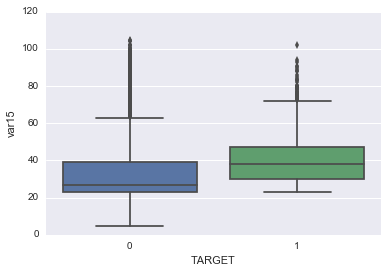

In [74]:
sns.boxplot(y,X_imp['var15']);

In [389]:
# Нормализуем данные к количеству значений
X0 = X_imp
X0['TARGET'] = y
X0['Count'] = y
X0=X0[['var15','TARGET','Count']]
# Количество данных в категориях TARGET
z_0 = X0[['TARGET','Count']].groupby('TARGET').count()
# Количество данных по категориям TARGET и переменной var15
z = X0.groupby(['TARGET','var15'],axis=0).count()
# Вычислим отношения
xx =z.merge(z_0, left_index='TARGET', right_index='TARGET')
xx ['Count'] = xx['Count_x']/xx['Count_y']
# 'Count' - переменная показывающая, сколько данных попадает в ту или иную категорию, относительно количества данных в группе TARGET
#xx

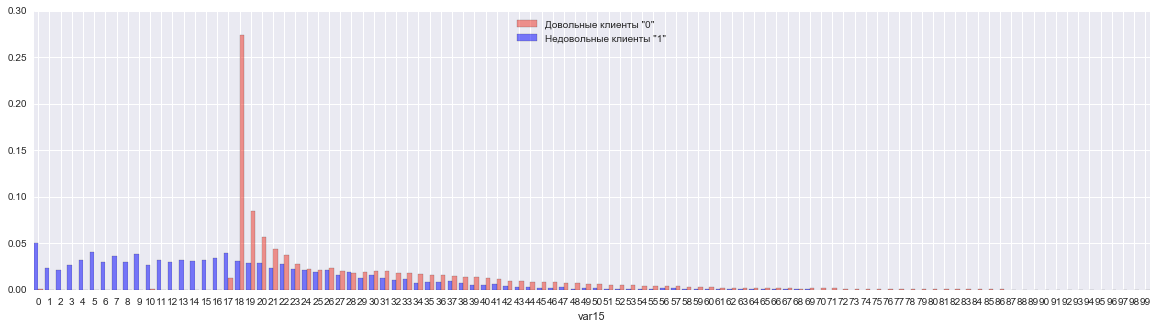

In [388]:
# Гистограмма
pos = np.array(range(len(xx.loc[0]['Count'])))
width = 0.4

fig, ax = plt.subplots(figsize=(20,5))

plt.bar(pos+width, xx.loc[0]['Count'], width, alpha=0.5, color='#EE3224')

ax.set_xticks([p+width for p in pos] );
ax.set_xticklabels(xx.index.labels[1]);
pos = np.array(range(len(xx.loc[1]['Count'])))

plt.bar(pos, xx.loc[1]['Count'], width, alpha=0.5, color= 'blue')
ax.legend(('Довольные клиенты "0"', 'Недовольные клиенты "1"'),loc='upper center');
ax.set_xlabel(('var15'));

*Вывод:* По гистограмме заметна зависимость целевой переменной от исследуемой: 

* Пик довольных клиентов приходится на значение переменной ~18.

* При значении > 18 и < 23 количество довольных клиентов больше количества недовольных.

* При значении переменной < 18  значительно больше недовольных клиентов (практически все - недовольные).



*Переменная "num_var4"*

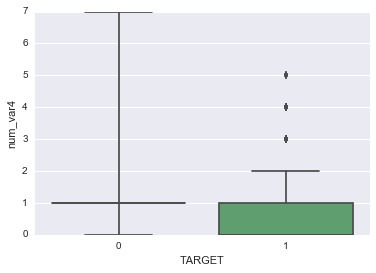

In [75]:
sns.boxplot(y,X_imp['num_var4']);

* Основное количество довольных клиентов приходится на значение переменной 1.

* Основное количество недовольных клиентов приходится на значения 0 и 1.

In [364]:
# Нормализуем данные к количеству значений
X0 = X_imp
X0['TARGET'] = y
X0['Count'] = y
X0=X0[['num_var4','TARGET','Count']]
# Количество данных в категориях TARGET
z_0 = X0[['TARGET','Count']].groupby('TARGET').count()
# Количество данных по категориям TARGET и переменной num_var4
z = X0.groupby(['TARGET','num_var4'],axis=0).count()
# Вычислим отношения
xx =z.merge(z_0, left_index='TARGET', right_index='TARGET')
xx ['Count'] = xx['Count_x']/xx['Count_y']
# 'Count' - переменная показывающая, сколько данных попадает в ту или иную категорию, относительно количества данных в группе TARGET
#xx

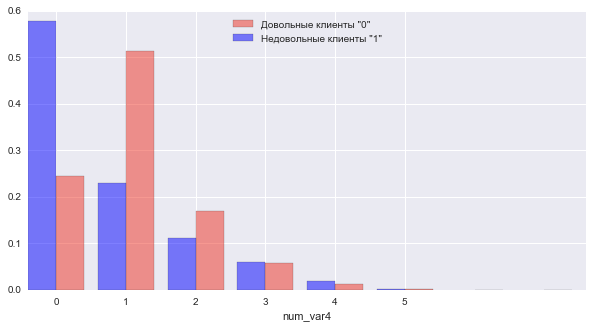

In [365]:
# Гистограмма
pos = np.array(range(len(xx.loc[0]['Count'])))
width = 0.4

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos+width, xx.loc[0]['Count'], width, alpha=0.5, color='#EE3224')
pos = np.array(range(len(xx.loc[1]['Count'])))

plt.bar(pos, xx.loc[1]['Count'], width, alpha=0.5, color= 'blue')

ax.set_xticks([p+width for p in pos] );
ax.set_xticklabels(xx.index.labels[1]);
ax.legend(('Довольные клиенты "0"', 'Недовольные клиенты "1"'),loc='upper center',);
ax.set_xlabel(('num_var4'));

*Вывод:* По гистограмме заметна зависимость целевой переменной от исследуемой: 

* Наблюдается обратная зависимость для недовольных клиентов. Для нименьшего значения переменной соответствует максимальное количество недовольных клиентов, и, наоборт.

* При значении переменной, равной 1 или 2, количество довольных клиентов значительно больше, чем недовольных.

*Переменная "num_meses_var5_ult3"*

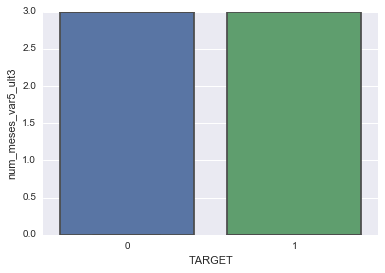

In [81]:
sns.boxplot(y,X_imp['num_meses_var5_ult3']);

* Переменная изменяется в одинаковых пределах для счастливых и несчастливых клиентов.

In [362]:
# Нормализуем данные к количеству значений
X0 = X_imp
X0['TARGET'] = y
X0['Count'] = y
X0=X0[['num_meses_var5_ult3','TARGET','Count']]
# Количество данных в категориях TARGET
z_0 = X0[['TARGET','Count']].groupby('TARGET').count()
# Количество данных по категориям TARGET и переменной num_meses_var5_ult3
z = X0.groupby(['TARGET','num_meses_var5_ult3'],axis=0).count()
# Вычислим отношения
xx =z.merge(z_0, left_index='TARGET', right_index='TARGET')
xx ['Count'] = xx['Count_x']/xx['Count_y']
# 'Count' - переменная показывающая, сколько данных попадает в ту или иную категорию, относительно количества данных в группе TARGET
#xx

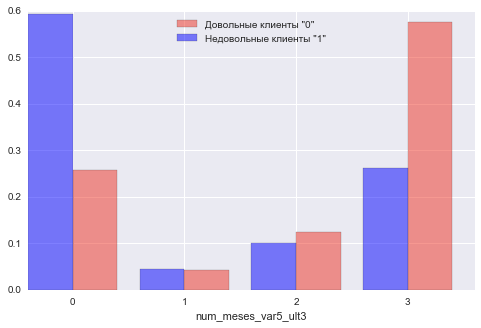

In [363]:
# Гистограмма
pos = np.array(range(len(xx.loc[0]['Count'])))
width = 0.4

fig, ax = plt.subplots(figsize=(8,5))

plt.bar(pos+width, xx.loc[0]['Count'], width, alpha=0.5, color='#EE3224')
plt.bar(pos, xx.loc[1]['Count'], width, alpha=0.5, color= 'blue')

ax.set_xticks([p+width for p in pos] );
ax.set_xticklabels(xx.index.labels[1]);
ax.legend(('Довольные клиенты "0"', 'Недовольные клиенты "1"'),loc='upper center',);
ax.set_xlabel(('num_meses_var5_ult3'));

*Вывод:* По гистограмме заметна зависимость целевой переменной от исследуемой: 

* при значении переменной <= 1 количество недовольных клиентов возрастает значительно,

* при значении переменной >= 2 количество довольных клиентов возрастает значительно.

**Вещественные переменные**

In [84]:
X_f # вещественные переменные

['var38',
 'saldo_var30',
 'saldo_var42',
 'saldo_medio_var5_ult1',
 'saldo_var5',
 'saldo_medio_var5_hace2']

In [107]:
XX1 = X_imp[X_f[0:3]]
XX1['TARGET']=y

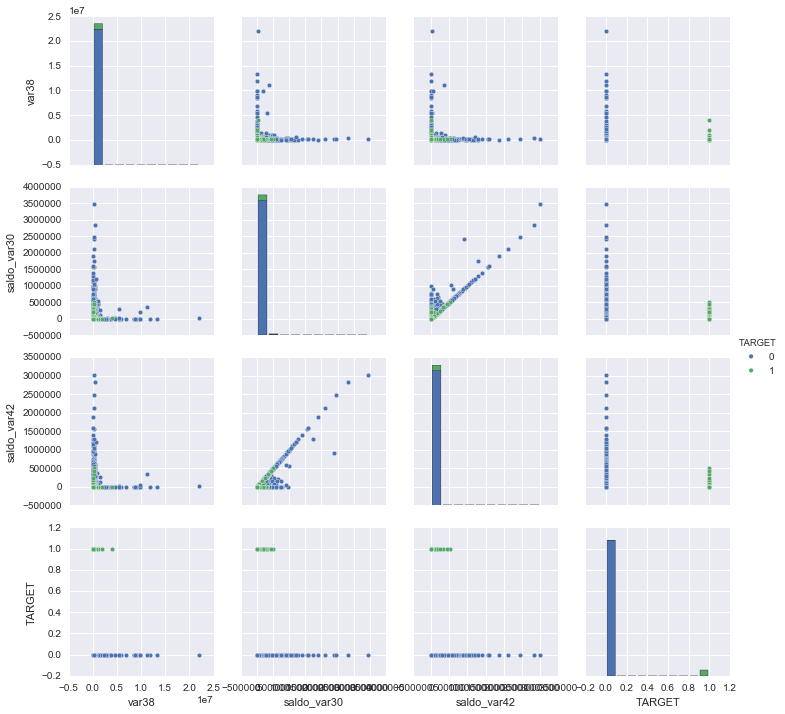

In [108]:
sns.pairplot(data = XX1,hue = 'TARGET')

In [109]:
XX2 = X_imp[X_f[3:]]
XX2['TARGET']=y

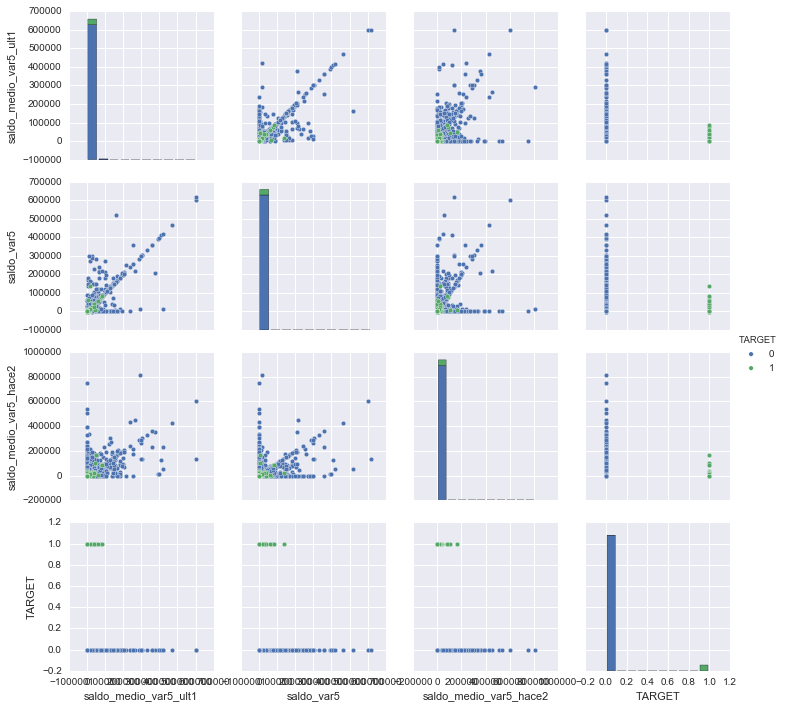

In [110]:
sns.pairplot(data = XX2,hue = 'TARGET')

По построенным диаграммам наблюдается:
    
* Относительно всех вещественных переменных скопление точек значений целевой переменной для недовольных клиентов находится в небольшом радиусе окружности от начала координат.

* Многие вещественные переменные имеют ярко выраженную зависимость, особенно четко прослеживается у переменных saldo_var32 и saldo_var40.

**Бинарные признаки**

In [111]:
X_b # бинарные признаки

['ind_var30']

In [392]:
# Нормализуем данные к количеству значений
X0 = X_imp
X0['TARGET'] = y
X0['Count'] = y
X0=X0[['ind_var30','TARGET','Count']]
# Количество данных в категориях TARGET
z_0 = X0[['TARGET','Count']].groupby('TARGET').count()
# Количество данных по категориям TARGET и переменной ind_var30
z = X0.groupby(['TARGET','ind_var30'],axis=0).count()
# Вычислим отношения
xx =z.merge(z_0, left_index='TARGET', right_index='TARGET')
xx ['Count'] = xx['Count_x']/xx['Count_y']
# 'Count' - переменная показывающая, сколько данных попадает в ту или иную категорию, относительно количества данных в группе TARGET
#xx

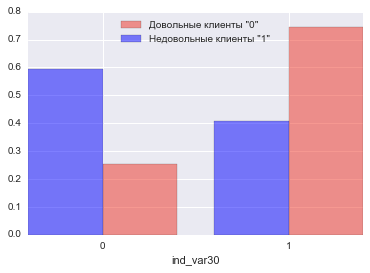

In [394]:
# Гистограмма
pos = np.array(range(len(xx.loc[0]['Count'])))
width = 0.4

fig, ax = plt.subplots(figsize=(6,4))

plt.bar(pos+width, xx.loc[0]['Count'], width, alpha=0.5, color='#EE3224')
plt.bar(pos, xx.loc[1]['Count'], width, alpha=0.5, color= 'blue')

ax.set_xticks([p+width for p in pos] );
ax.set_xticklabels(xx.index.labels[1]);
ax.legend(('Довольные клиенты "0"', 'Недовольные клиенты "1"'),loc='upper center',);
ax.set_xlabel(('ind_var30'));

*Вывод:* По гистограмме заметна зависимость целевой переменной от исследуемой: 

* При значении переменной = 0 количество недовольных клиентов значительно больше количества довольных.

* При значении переменной = 1 количество довольных клиентов значительно больше количества недовольных.

**Проверяем простые статистические гипотезы **

*1) Проверим гипотизу о том, что доля довольных клиентов отличается от доли недовольных клиентов относительно признака ind_var30:*

H0: доли клиентов, как довольных, так и недовольных, равны при обоих значениях признака ind_var30.

H1: доли количества довольных и недоволных клиентов не равны.

In [60]:
import sys
sys.path.append('../../scripts/') 

In [61]:
from yandex_mipt_stat_tests import proportions_diff_z_test, proportions_diff_z_stat_ind 

In [79]:
z_stat = proportions_diff_z_stat_ind(y[X_imp['ind_var30']==0], y[X_imp['ind_var30']==1])
print('z_stat:',z_stat)
print('p-value:',proportions_diff_z_test(z_stat))

z_stat: 41.3053439345
p-value: 0.0


p-value при z-тесте явно меньше 0,5.

Следовательно, отвергаем нулевую гипотезу.

*Вывод:* Средние доли количества недовольных и довольных клиентов при обоих значениях перменных отличаются (статистически значимы).

*2) Проверим гипотизу о том, что среднее значение признака var15 довольных клиентов отличается от среднего значения признака var15 недовольных клиентов:*

H0: Средние переменной var15 для довольных и недовольных клиентов равны.
H1: Средние переменной var15 для довольных и недовольных клиентов не равны.

In [69]:
from scipy.stats import ttest_ind

In [78]:
t_stat = ttest_ind(X_imp['var15'][y == 1],X_imp['var15'][y == 0],equal_var=False)
print('t_stat:', t_stat[0])
print('p-value:', t_stat[1])

t_stat: 30.0187497525
p-value: 2.96121334267e-175


p-value при t-тесте явно меньше 0,5.

Следовательно, отвергаем нулевую гипотезу.

*Вывод:* Средние переменной var15 для довольных и недовольных клиентов не равны (статистически значимы).

###  Часть 4. Закономерности, "инсайты", особенности данных

**Особенности данных**

* Пропусков в данных нет;

* 34 полностью нулевых признака и признаков констант;

* 29 пар признаков-дубликатов;

* Есть признаки, зависящие от других признаков (корреляция);

* Присутствует дисбаланс классов целевой переменной в имеющихся данных ("0":"1" ~ 24:1)


**Закономерности**

Целевая переменная зависит 
                            
                            от вещественных признаков:
                            
Для всех: скопление значений признаков для группы недовольных клиентов сосредоточены ~ 1/3-1/4 относительно всего размаха значений ближе к нулю.

- var38

- saldo_var30

- saldo_var42

- saldo_medio_var5_ult1

- saldo_var5

- saldo_medio_var5_hace2

                            от целочисленных признаков:
                            
- var15: 

Пик довольных клиентов приходится на значение переменной ~18.

При значении > 18 и < 23 количество довольных клиентов больше количества недовольных.

При значении переменной < 18  значительно больше недовольных клиентов (практически все - недовольные).

- num_var4:

Наблюдается обратная зависимость для недовольных клиентов. Для нименьшего значения переменной соответствует максимальное количество недовольных клиентов, и, наоборт.

При значении переменной, равной 1 или 2, количество довольных клиентов значительно больше, чем недовольных.

- num_meses_var5_ult3:

При значении переменной <= 1 количество недовольных клиентов возрастает значительно,

При значении переменной >= 2 количество довольных клиентов возрастает значительно.

                            от бинарных признаков:
- ind_var30:

При значении переменной = 0 количество недовольных клиентов значительно больше количества довольных.

При значении переменной = 1 количество довольных клиентов значительно больше количества недовольных.







###  Часть 5. Предобработка данных 

###  Часть 6. Построение признаков

###  Часть 7. Отбор признаков

###  Часть 8. Построение модели

###  Часть 9. Кросс-валидация, подбор параметров

###  Часть 10. Кривые валидации и обучения

###  Часть 11. Прогноз для тестовой (или отложенной) выборки

###  Часть 12. Оценка модели с описанием выбранной метрики

### Часть 13. Выводы 